In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Task 1

In [2]:
A = np.array([[20, -56, 54, -26], [-26, -64, -36, -94], [-16, 16, -36, 109]])

In [3]:
V = np.array([[0, 4, -1, 8], [4, 0, -8, 1], [-1, 8, 0, 4], [8, 1, 4, 0]]) / 9
S = np.array([[162, 0, 0, 0], [0, 81, 0, 0], [0, 0, 54, 0]])
U = A @ V @ np.linalg.pinv(S)

In [4]:
np.round(U, 2)

array([[-0.33,  0.67,  0.67],
       [-0.67, -0.67,  0.33],
       [ 0.67, -0.33,  0.67]])

In [5]:
U @ S @ V.T

array([[ 20., -56.,  54., -26.],
       [-26., -64., -36., -94.],
       [-16.,  16., -36., 109.]])

## Task 2

In [6]:
F = np.array([[-2, 9], [3, -11], [-1, 5], [4, -15]])
G = np.array([[1, 0, 1], [0, 1, 1]])

F @ G

array([[ -2,   9,   7],
       [  3, -11,  -8],
       [ -1,   5,   4],
       [  4, -15, -11]])

In [7]:
np.round(G.T @ np.linalg.inv(G @ G.T) @ np.linalg.inv(F.T @ F) @ F.T, 2)

array([[ 0.78,  0.46,  0.71,  0.39],
       [-0.21, -0.14, -0.19, -0.13],
       [ 0.57,  0.31,  0.52,  0.26]])

## Task 3

In [8]:
A = np.array([[-3, -8, 7, 12], [2, 2, -14, 8], 
              [-4, -10, 13, 11], [1, 0, -6, 5]])

b = np.array([2, 3, 2, 9]).T

In [9]:
F = A[:, :3]
G = np.array([[1, 0, 0, -1], [0, 1, 0, -2], 
              [0, 0, 1, -1]])

F @ G

array([[ -3,  -8,   7,  12],
       [  2,   2, -14,   8],
       [ -4, -10,  13,  11],
       [  1,   0,  -6,   5]])

In [10]:
A_pinv = np.round(G.T @ np.linalg.inv(G @ G.T) @ np.linalg.inv(F.T @ F) @ F.T, 2)
A_pinv

array([[-0.85, -0.82,  0.54,  2.13],
       [ 0.38,  0.39, -0.27, -1.  ],
       [-0.02, -0.06,  0.03,  0.05],
       [ 0.1 ,  0.11, -0.03, -0.18]])

In [11]:
A_pinv @ b

array([16.09, -7.61,  0.29, -1.15])

## Task 4

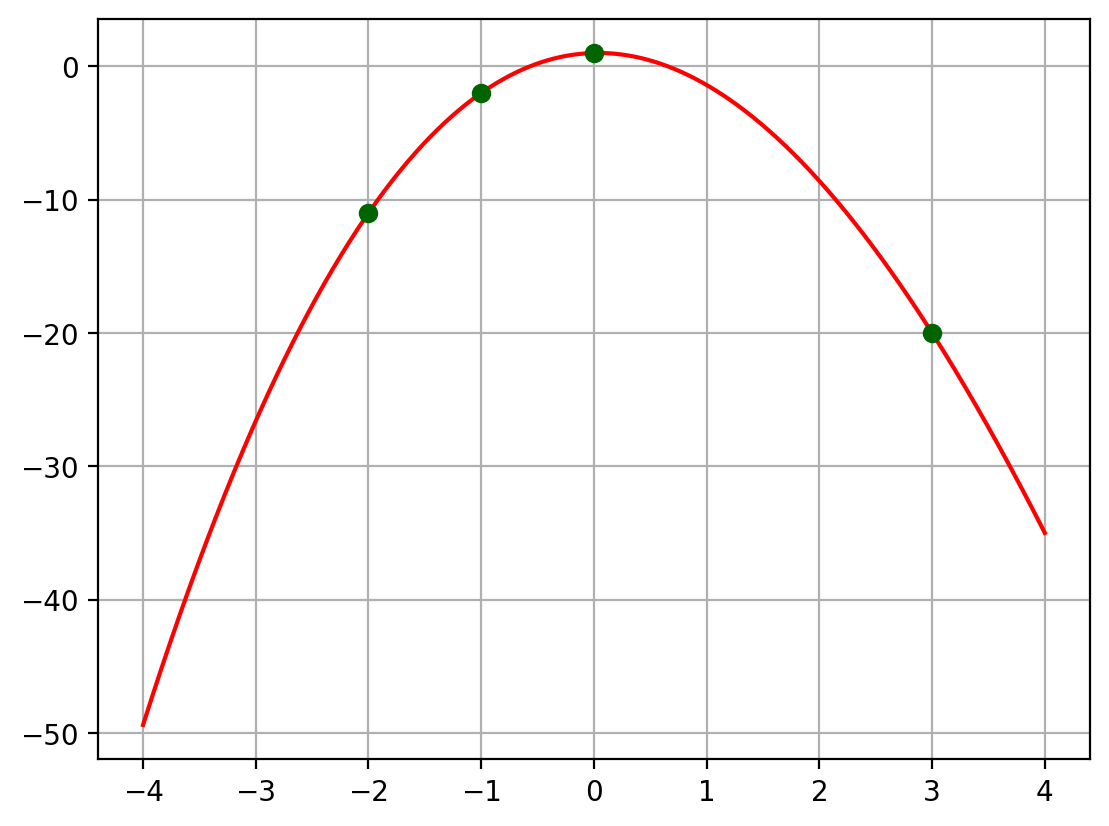

In [12]:
x = np.linspace(-4, 4, 1000)

knots = np.array([[-2, -1, 0, 3], [-11, -2, 1, -20]])

def f(x):
    return x ** 3 / 10 - 27 * x ** 2 / 10 +x / 5 + 1

plt.figure(dpi=200)
plt.plot(x, f(x), color='red')

for i in range(knots.shape[1]):
    data = knots[:, i]
    x, y = data[0], data[1]
    plt.plot(x, y, marker='o', color='darkgreen')

plt.grid()
plt.savefig('task4_1', dpi=200)
plt.show()

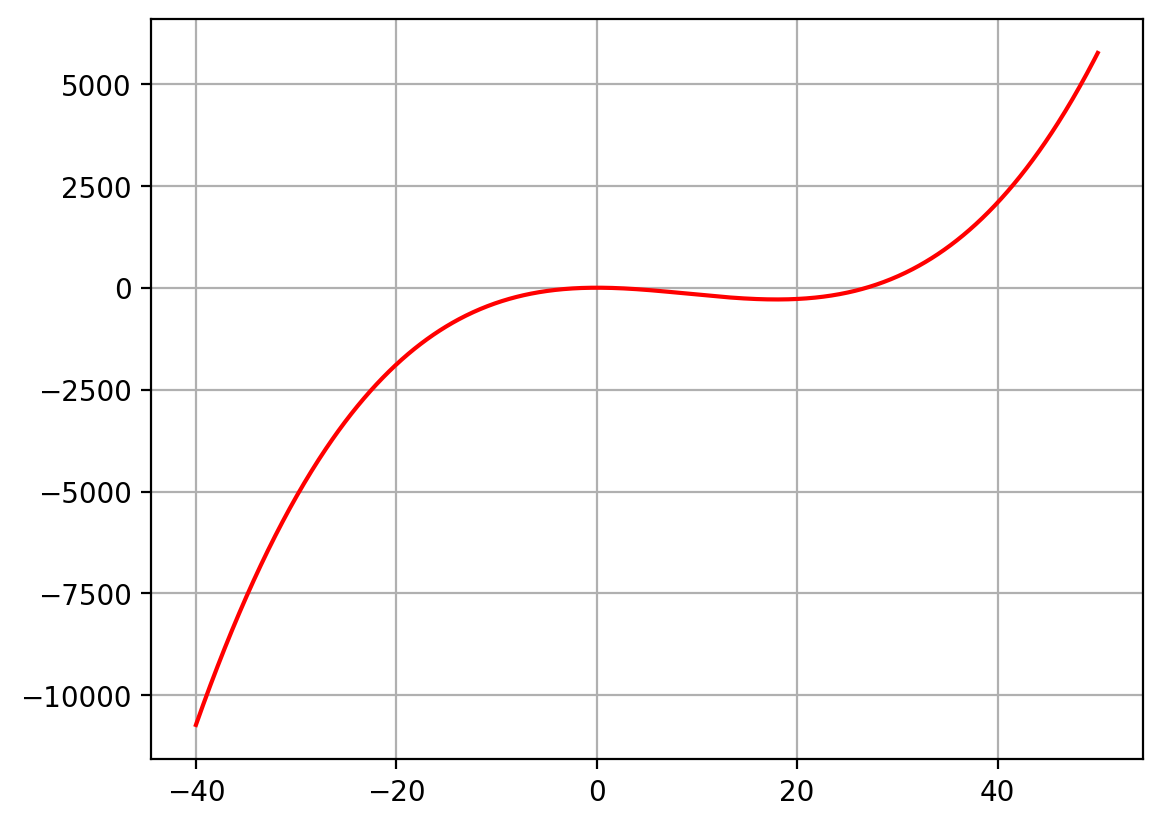

In [13]:
x = np.linspace(-40, 50, 1000)

plt.figure(dpi=200)
plt.plot(x, f(x), color='red')

plt.grid()
plt.savefig('task4_2', dpi=200)
plt.show()

## Task 5

In [14]:
knots = np.array([[1, 3, 4, 7], [2, 2, 5, 0]])

def bezier_curve(t):
    return 3 * t ** 3 - 3 * t ** 2 + 6 * t + 1, -11 * t ** 3 + 9 * t ** 2 + 2

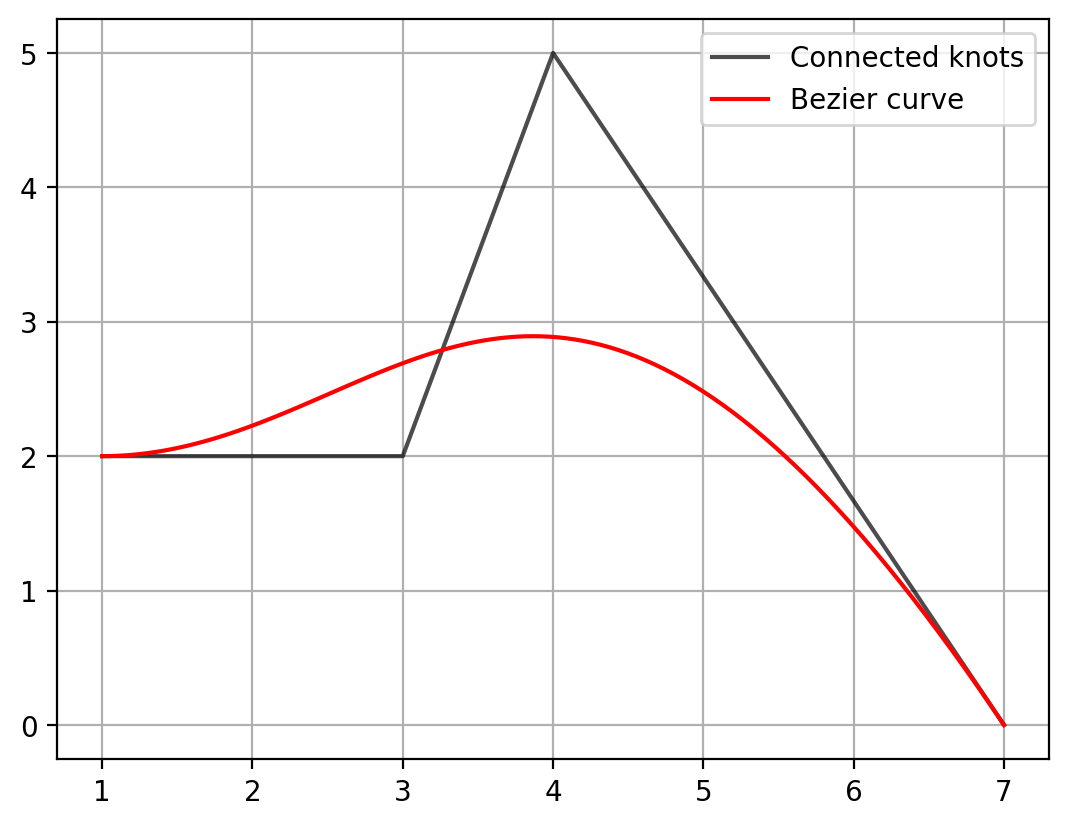

In [15]:
plt.figure(dpi=200)
x, y = [], []
for i in np.linspace(0, 1, 100):
    points = bezier_curve(i)
    x.append(points[0]) 
    y.append(points[1])
plt.plot(knots[0], knots[1], label='Connected knots', color='black',alpha=0.7)
plt.plot(x, y, label='Bezier curve', color='red')
plt.legend()
plt.grid()
plt.savefig('task5')
plt.show()

## Task 7

In [16]:
def round_res(x):
    return np.round(x[0], 4)

In [17]:
def f_0(x):
    return np.sqrt(6*x+11)/np.sqrt(1-x**2)

round_res(integrate.quad(f_0, -1, 1))

10.2101

In [18]:
def f_1(x):
    return x * np.sqrt(6*x+11)/np.sqrt(1-x**2)

round_res(integrate.quad(f_1, -1, 1)) 

1.4656

In [19]:
def f_2(x):
    return (2*x**2-1) * np.sqrt(6*x+11)/np.sqrt(1-x**2)

round_res(integrate.quad(f_2, -1, 1)) 

/var/folders/cr/12mnwryn4bj3dhrct6_xvw340000gn/T/ipykernel_13546/123189033.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  round_res(integrate.quad(f_2, -1, 1))


-0.1075

In [20]:
def f_3(x):
    return (4*x**3-3*x) * np.sqrt(6*x+11)/np.sqrt(1-x**2)

round_res(integrate.quad(f_3, -1, 1)) 

0.0159